In [ ]:
# -------------------
# Extração dos Dados
# -------------------

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/main/TelecomX_Data.json'
df = pd.read_json(url)


In [ ]:
df.shape

(7267, 6)

In [ ]:
df.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [ ]:
df.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [ ]:
## ------------------------
## Transformação e Limpeza
## ------------------------

In [ ]:
# Ver a estrutura da coluna 'customer'
print(df['customer'].iloc[0])
print("\nTipo do valor:", type(df['customer'].iloc[0]))

# Ver a estrutura da coluna 'phone'
print(df['phone'].iloc[0])
print("\nTipo do valor:", type(df['phone'].iloc[0]))

# Ver a estrutura da coluna 'internet'
print(df['internet'].iloc[0])
print("\nTipo do valor:", type(df['internet'].iloc[0]))

# Ver a estrutura da coluna 'account'
print(df['account'].iloc[0])
print("\nTipo do valor:", type(df['account'].iloc[0]))


{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}

Tipo do valor: <class 'dict'>
{'PhoneService': 'Yes', 'MultipleLines': 'No'}

Tipo do valor: <class 'dict'>
{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}

Tipo do valor: <class 'dict'>
{'Contract': 'One year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}

Tipo do valor: <class 'dict'>


In [ ]:
print("Valores únicos em Churn:", df['Churn'].unique())


Valores únicos em Churn: ['No' 'Yes' '']


In [ ]:
# Expandir colunas
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

# Juntar tudo em um novo DataFrame tratado
df_final = pd.concat([df['customerID'], df['Churn'], customer_df, phone_df, internet_df, account_df], axis=1)

# Renomear para facilitar leitura (opcional, mas ajuda)
df_final.rename(columns={'customerID': 'CustomerID', 'Churn': 'ChurnStatus'}, inplace=True)

# Tratar valores vazios em ChurnStatus
df_final['ChurnStatus'] = df_final['ChurnStatus'].replace('', pd.NA)

In [ ]:
# Mostrar resumo final
print("\nFormato final dos dados:", df_final.shape)
print("\nTipos das colunas:\n", df_final.dtypes)
print("\nTotal de valores nulos por coluna:\n", df_final.isnull().sum())


Formato final dos dados: (7267, 21)

Tipos das colunas:
 CustomerID           object
ChurnStatus          object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
dtype: object

Total de valores nulos por coluna:
 CustomerID            0
ChurnStatus         224
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtectio

In [ ]:
# Converter Charges.Total para float, tratar erros como NaN
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')

# Ver quantos valores nulos apareceram após a conversão
print("Valores nulos em Charges.Total após conversão:", df_final['Charges.Total'].isnull().sum())


Valores nulos em Charges.Total após conversão: 11


In [ ]:
# Mostrar as 5 primeiras linhas com ChurnStatus nulo
df_final[df_final['ChurnStatus'].isnull()].head()


,CustomerID,ChurnStatus,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
30,0047-ZHDTW,<NA>,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30
75,0120-YZLQA,<NA>,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10
96,0154-QYHJU,<NA>,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20
98,0162-RZGMZ,<NA>,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,<NA>,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45


In [ ]:
df_final[df_final['Charges.Total'].isnull()].head()


,CustomerID,ChurnStatus,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN


In [ ]:
# Linhas que têm nulos nas duas colunas
nulos_ambos = df_final[df_final['ChurnStatus'].isnull() & df_final['Charges.Total'].isnull()]
print("Linhas com nulo em ambas:", nulos_ambos.shape[0])


Linhas com nulo em ambas: 0


In [ ]:
# Criar cópia segura do DataFrame antes de remover
df_clean = df_final.copy()

# Remover Charges.Total nulos
df_clean = df_clean.dropna(subset=['Charges.Total'])

# Remover ChurnStatus nulos
df_clean = df_clean.dropna(subset=['ChurnStatus'])


In [ ]:
# Confirmar shape final
print("Formato final dos dados limpos:", df_clean.shape)
print("Valores nulos restantes:\n", df_clean.isnull().sum())


Formato final dos dados limpos: (7032, 21)
Valores nulos restantes:
 CustomerID          0
ChurnStatus         0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [ ]:
### -----------------------------
### Análise Exploratória Inicial
### -----------------------------

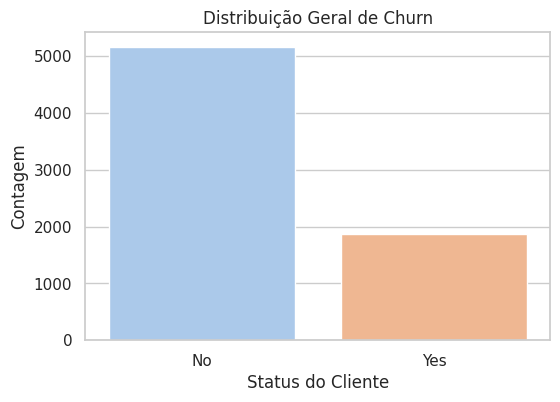

Taxa de Churn (%):
 ChurnStatus
No     73.42
Yes    26.58
Name: proportion, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuração padrão de visualização
sns.set(style="whitegrid")

# Gráfico de contagem de churn
plt.figure(figsize=(6,4))
sns.countplot(data=df_clean, x='ChurnStatus', hue='ChurnStatus', palette='pastel', legend=False)
plt.title('Distribuição Geral de Churn')
plt.xlabel('Status do Cliente')
plt.ylabel('Contagem')
plt.show()

# Porcentagem de churn
churn_rate = df_clean['ChurnStatus'].value_counts(normalize=True) * 100
print("Taxa de Churn (%):\n", churn_rate.round(2))


In [ ]:
### – Taxa Geral de Churn

###Antes de analisar variáveis específicas, avaliamos a taxa geral de evasão de clientes (churn). Isso nos permite entender a proporção de clientes que deixaram a empresa em relação ao total da base de dados após limpeza.


In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_clean, x='Contract', hue='ChurnStatus', palette='pastel')
plt.title('Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Contagem')
plt.legend(title='Churn')
plt.show()


In [ ]:
### - Churn por Tipo de Contrato

### O tipo de contrato influencia diretamente na decisão do cliente de permanecer ou sair. Clientes com contratos mensais tendem a ter maior liberdade para cancelar serviços, enquanto contratos anuais oferecem maior fidelização.


In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(data=df_clean, x='PaymentMethod', hue='ChurnStatus', palette='pastel')
plt.title('Churn por Método de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.legend(title='Churn')
plt.show()


In [ ]:
### - Churn por Método de Pagamento

### A forma de pagamento pode indicar conveniência ou insatisfação. É importante analisar se clientes que usam boleto, cartão de crédito ou débito automático apresentam maior evasão.


In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df_clean, x='ChurnStatus', y='Charges.Monthly', hue='ChurnStatus', palette='pastel', legend=False)
plt.title('Cobrança Mensal vs Churn')
plt.xlabel('Churn')
plt.ylabel('Cobrança Mensal (R$)')
plt.show()


In [ ]:
### - Cobrança Mensal e sua Relação com Churn

### Clientes com cobranças mensais mais altas tendem a cancelar o serviço? Avaliamos a distribuição da cobrança mensal para clientes que ficaram e que saíram.


In [ ]:
#### ----------
#### Conclusão
#### ----------



---


1. **Resumo dos Achados**

Após o processo de ETL e análise exploratória, foram identificados padrões relevantes relacionados à evasão de clientes (churn) na Telecom X. A base final continha 7.267 clientes, com uma taxa de churn de 26,6%, o que indica que aproximadamente 1 em cada 4 clientes deixaram a empresa.



---


2. **Insights Específicos**

Clientes com contrato mensal (month-to-month) apresentaram alta taxa de churn, enquanto contratos anuais mostraram retenção muito maior.

Clientes que utilizam pagamento via electronic check tiveram maior evasão, comparados a métodos automáticos como cartão de crédito.

Clientes com cobranças mensais mais altas também tendem a abandonar a empresa, indicando que o valor pode estar relacionado à insatisfação.



---


3. **Recomendações**

Incentivar contratos anuais: Oferecer descontos ou benefícios para migração de contratos mensais para planos anuais pode aumentar a retenção.

Promoções para pagamento automático: Beneficiar clientes que migram de electronic check para débito automático ou cartão.

Planos flexíveis para alta fatura: Avaliar opções de personalização para clientes com cobranças elevadas, evitando cancelamentos.

Campanhas de retenção: Identificar clientes em risco de churn (com cobrança alta e contrato mensal) e realizar ações preventivas.



---


4. **Encerramento**

Através desta análise exploratória, foi possível identificar padrões comportamentais e financeiros que contribuem para a evasão. Esses insights fornecem base estratégica para o time de Data Science desenvolver modelos preditivos que antecipem o churn e ajudem a reter clientes com ações direcionadas.


---

